<a href="https://colab.research.google.com/github/AhmetSarici/DataScience/blob/ML/PLS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PLS

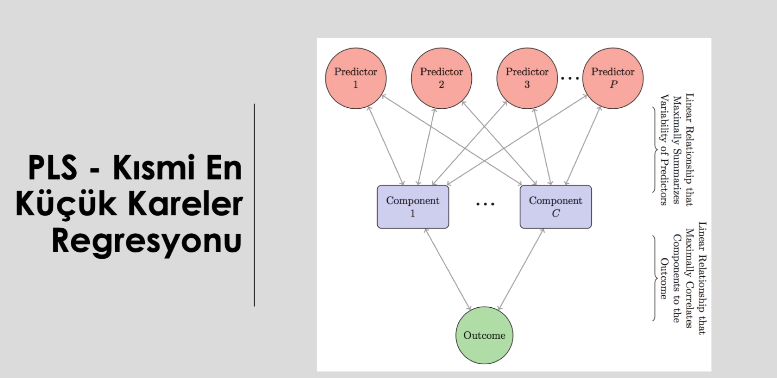

Değişkenlerin daha az sayıda ve aralarında çoklu doğrusal bağlantı problemi olmayan bileşenlere indirgeyip regresyon modeli kurulması fikrine dayanır.
Herman World

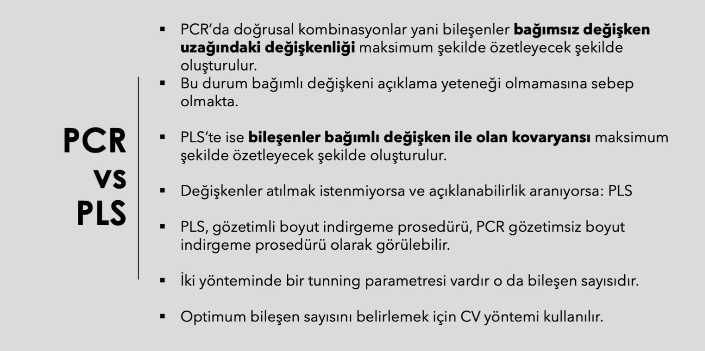

## Model

In [ ]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
ms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
from sklearn.cross_decomposition import PLSRegression, PLSSVD

In [ ]:
#pls_model = PLSRegression().fit(X_train, y_train)
pls_model = PLSRegression(n_components=2).fit(X_train, y_train)
#n_componants=2 => model kurma aşamasında bileşen sayısı belirler

In [ ]:
#bileşenlerimizin katsayılar
pls_model.coef_

array([[ 35.32916493],
       [ 48.83425857],
       [ 18.50240933],
       [ 39.28117603],
       [ 30.59952998],
       [ 40.03398345],
       [ 16.85990516],
       [ 28.22289896],
       [ 32.73784993],
       [ 22.00875744],
       [ 33.60903032],
       [ 30.39402522],
       [ 25.73279799],
       [ 54.98835148],
       [  6.56590871],
       [ -0.90894359],
       [ 17.60903423],
       [-37.24246339],
       [ 14.69680385]])

## Tahmin

In [ ]:
X_train.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,League_N,Division_W,NewLeague_N
183,328.0,91.0,12.0,51.0,43.0,33.0,2.0,342.0,94.0,12.0,51.0,44.0,33.0,145.0,59.0,8.0,1,0,1
229,514.0,144.0,0.0,67.0,54.0,79.0,9.0,4739.0,1169.0,13.0,583.0,374.0,528.0,229.0,453.0,15.0,1,0,1
286,593.0,152.0,23.0,69.0,75.0,53.0,6.0,2765.0,686.0,133.0,369.0,384.0,321.0,315.0,10.0,6.0,0,1,0
102,233.0,49.0,2.0,41.0,23.0,18.0,8.0,1350.0,336.0,7.0,166.0,122.0,106.0,102.0,132.0,10.0,0,0,0
153,341.0,95.0,6.0,48.0,42.0,20.0,10.0,2964.0,808.0,81.0,379.0,428.0,221.0,158.0,4.0,5.0,1,1,1


In [ ]:
pls_model.predict(X_train)[0:10]

array([[344.91941493],
       [848.87070769],
       [692.93622642],
       [185.56577984],
       [435.49196077],
       [987.49530026],
       [120.63097106],
       [289.9263406 ],
       [663.41886918],
       [817.90486641]])

In [ ]:
#
y_pred = pls_model.predict(X_train)

In [ ]:
#Train hatası
np.sqrt(mean_squared_error(y_train, y_pred))

310.1167593109696

In [ ]:
r2_score(y_train, y_pred)

0.5140424486535481

In [ ]:
#Test Hatası
y_pred = pls_model.predict(X_test)

In [ ]:
np.sqrt(mean_squared_error(y_test, y_pred))

398.09956327448526

## Model Tuning

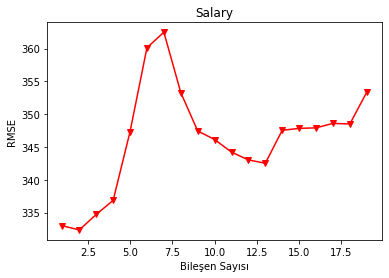

In [ ]:
#CV
cv_10 = model_selection.KFold(n_splits=10, 
                              shuffle=True, 
                              random_state=1)


#Hata hesaplamak için döngü
RMSE = []

for i in np.arange(1, X_train.shape[1] + 1):
    pls = PLSRegression(n_components=i)
    score = np.sqrt(-1*cross_val_score(pls, X_train, y_train, cv=cv_10, scoring='neg_mean_squared_error').mean())
    RMSE.append(score)

#Sonuçların Görselleştirilmesi
plt.plot(np.arange(1, X_train.shape[1] + 1), np.array(RMSE), '-v', c = "r")
plt.xlabel('Bileşen Sayısı')
plt.ylabel('RMSE')
plt.title('Salary');

2 Bileşen olduğu zaman optimum (en düşük hatayı) vereceği görülmekte

In [ ]:
#2 bileşenli final model
pls_model = PLSRegression(n_components = 2).fit(X_train, y_train)

In [ ]:
#Test ile tahmin edilen değerler
y_pred = pls_model.predict(X_test)

In [ ]:
#RMSE
np.sqrt(mean_squared_error(y_test, y_pred))

398.09956327448526